In [1]:
import urllib.request
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import html5lib
import warnings
warnings.filterwarnings('ignore')

So I found htis website that has seat allotments as a table

here:-
 https://bhargava.me/tools/college-wise-allotment-details/ts/

Let's scrape the seat allotments at CVR for ECE branch.
1) we begin by loading the url and use requests to avoid **403 forbidden error**

2) we then use Pandas scraping ability by parsing html using `read_html` which results in a list datatype of the DataFrame content (scrapper)

3) convert it into a Pandas DataFrame (ranks)

4) inspect the head using `head()`

In [2]:
url = requests.get('https://bhargava.me/tools/college-wise-allotment-details/ts/eamcet/?id=CVRH&branch=ECE&year=2021')

In [3]:
scrapper = pd.read_html(url.text)
ranks=pd.DataFrame(scrapper[0])

In [4]:
ranks.head()

,Sl.No.,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY
0,1,6187,NAGISETTY NEERAJ,M,AU,OC,OC_GEN_UR
1,2,6292,VIGNESH KUMAR ARRA,M,OU,BC_B,OC_GEN_OU
2,3,8040,NAGULAPALLI SHIVANI,F,OU,OC,OC_GIRLS_OU
3,4,8317,GANTI SUDARSHAN,M,OU,OC,OC_GEN_OU
4,5,8517,GUNDLA VEDHA KUMAR REDDY,M,OU,OC,EWS_GEN_OU


In [5]:
ranks=ranks.drop(["Sl.No."],axis=1)
ranks.head()

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY
0,6187,NAGISETTY NEERAJ,M,AU,OC,OC_GEN_UR
1,6292,VIGNESH KUMAR ARRA,M,OU,BC_B,OC_GEN_OU
2,8040,NAGULAPALLI SHIVANI,F,OU,OC,OC_GIRLS_OU
3,8317,GANTI SUDARSHAN,M,OU,OC,OC_GEN_OU
4,8517,GUNDLA VEDHA KUMAR REDDY,M,OU,OC,EWS_GEN_OU


From the above example, the seat allotments in CVR for branch ECE is loaded up.
So the table for ECE in CVR has a specific id,

`?id=CVRH&branch=ECE&year=2021`

so let's fix `CVRH` and change the value of `branch` to scrape all seat allotmenets in CVR.

Let's scrape all seat allotments at CVR using a loop and above process

In [6]:
branch=['CIV','CSE','CSM','CSC','MEC','INF','ECE','EIE','EEE','CSI','CSD']
ranks=[]

for i in branch:
    url = requests.get(f'https://bhargava.me/tools/college-wise-allotment-details/ts/eamcet/?id=CVRH&branch={i}&year=2021')
    scrapper = pd.read_html(url.text)
    rank=pd.DataFrame(scrapper[0])
    rank=rank.drop(["Sl.No."],axis=1)
    rank['BRANCH']=i
    ranks.append(rank)

Let's Merge all Dataframe objects into a single DataFrame (cvr) and we are done. We sort the datafram by ranks.

In [7]:
cvr=pd.concat(ranks)

In [8]:
cvr=cvr.sort_values('RANK')
cvr.head()

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH
0,467,RAMA TEJA B,M,AU,OC,OC_GEN_UR,CSM
0,483,NAGIREDDY SAI TARUN TEJA,M,AU,OC,OC_GEN_UR,CSE
1,517,BATHINA BALAJI,M,AU,BC_D,OC_GEN_UR,CSE
2,543,RAVIPUDI SAKETH KUMAR,M,OU,OC,OC_GEN_OU,CSE
3,570,SHAIK MULLA ABEED BASHA,M,SVU,BC_E,OC_GEN_UR,CSE


In [10]:
cvr[cvr['BRANCH'].str.contains('MEC')]

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH
0,11953,KONDRU SRUJAN,M,OU,BC_B,OC_GEN_OU,MEC
1,17136,THUMMA RITESH RAJ,M,SVU,BC_C,OC_GEN_UR,MEC
2,19846,VANGRU GOPI CHAND,M,OU,BC_D,OC_GEN_OU,MEC
3,20256,MASHETTY SRIKAR,M,OU,OC,OC_CAP_GIRLS_UR(0),MEC
4,21057,SANGEM SRI SAI RUKESH,M,OU,BC_D,OC_PHV_GEN_OU,MEC
5,31864,BURRA ABHIRAM,M,SVU,OC,EWS_GEN_UR,MEC
6,45564,KATAM HARSH GOUD,M,OU,BC_B,BC_B_GEN_OU,MEC
7,46402,GANIARAPU SAI RAM,M,OU,BC_D,BC_D_GEN_OU,MEC
8,47520,ARMURI SAI KIRAN,M,OU,BC_B,BC_B_GEN_OU,MEC
9,48280,GUGULOTH KUMAR,M,OU,ST,ST_GEN_OU,MEC


In [10]:
cvr[cvr['BRANCH'].str.contains('CSE') & cvr['CANDIDATE NAME'].str.contains('PULI')]

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH
211,17724,PULI REVANTH PERSHAD,M,OU,SC,SC_GEN_OU,CSE


In [11]:
url="https://bhargava.me/tools/college-wise-allotment-details/ts/" #url to rank wise allotment details
url=requests.get(url)
scrapper = bs(url.text)  #To Scrape the college names

In [12]:
colleges=re.findall("\[....]",scrapper.get_text())  #Selecting College abbreviations using regex matching
print(colleges[0])
print(colleges[212])
print(len(colleges))

for i,x in enumerate(colleges):
    colleges[i]=x.replace('[',"")

for i,x in enumerate(colleges):
    colleges[i]=x.replace(']',"")
print("After removing the braces")
print(colleges[0])
print(colleges[212])

[ACEG]
[WITS]
213
After removing the braces
ACEG
WITS


In [13]:
url="https://edu.zo3.in/ts-college-list/college/?id=CVRH" #url to scrape branches of respective college
url=requests.get(url)
scrapper = pd.read_html(url.text)
ranks=pd.DataFrame(scrapper[0])
ranks.drop(0,axis=0,inplace=True)
ranks.head()

,0,1,2,3
1,CIV,CIVIL ENGINEERING,42,115000
2,CSC,CSE ( Cyber Security ),42,115000
3,CSD,CSE ( Data Science ),84,115000
4,CSE,COMPUTER SCIENCE AND ENGINEERING,210,115000
5,CSI,COMPUTER SCIENCE AND INFORMATION TECHNOLOGY,84,115000


In [14]:
for i in ranks[0]:
    print(i)

CIV
CSC
CSD
CSE
CSI
CSM
ECE
EEE
EIE
INF
MEC


In [15]:
data=pd.DataFrame(columns=['RANK', 'CANDIDATE NAME', 'GENDER', 'REGION', 'CATEGORY',
       'SEAT CATEGORY', 'BRANCH', 'COLLEGE'])
for col in colleges:
    print("**********************")
    print(col)
    try:
        url=f"https://edu.zo3.in/ts-college-list/college/?id={col}" #url to scrape branches of respective college
        url=requests.get(url)
        scrapper = pd.read_html(url.text)
        branches=pd.DataFrame(scrapper[0])
        branches.drop(0,axis=0,inplace=True)
        ranks=[]
        for br in branches[0]:
            url=f'https://bhargava.me/tools/college-wise-allotment-details/ts/eamcet/?id={col}&branch={br}&year=2021'
            url = requests.get(url)
            scrapper = pd.read_html(url.text)
            rank=pd.DataFrame(scrapper[0])
            rank=rank.drop(["Sl.No."],axis=1)
            rank['BRANCH']=br
            rank['COLLEGE']=col
            ranks.append(rank)
        data=data.append(ranks)
    except:
        print(f"No data found for {col} College so skipping it")
        pass
    print("**********************")

**********************
ACEG
**********************
**********************
AARM
**********************
**********************
AKIT
**********************
**********************
AIZA
No data found for AIZA College so skipping it
**********************
**********************
AITH
**********************
**********************
BOSE
**********************
**********************
ANRH
No data found for ANRH College so skipping it
**********************
**********************
ANRK
**********************
**********************
CVSR
**********************
**********************
ANWP
No data found for ANWP College so skipping it
**********************
**********************
ARJN
No data found for ARJN College so skipping it
**********************
**********************
AURH
No data found for AURH College so skipping it
**********************
**********************
AURG
No data found for AURG College so skipping it
**********************
**********************
AURP
No data found for AURP College so

**********************
**********************
MMTZ
No data found for MMTZ College so skipping it
**********************
**********************
NNRG
**********************
**********************
NREC
**********************
**********************
NRCM
**********************
**********************
NAWB
**********************
**********************
NGIT
**********************
**********************
NIET
No data found for NIET College so skipping it
**********************
**********************
NGMA
No data found for NGMA College so skipping it
**********************
**********************
NOVH
No data found for NOVH College so skipping it
**********************
**********************
OUCE
**********************
**********************
OUCT
**********************
**********************
PLMU
**********************
**********************
PALV
**********************
**********************
PETW
**********************
**********************
PRIW
No data found for PRIW College so skipping it
*****

In [39]:
data=data.sort_values("RANK")

In [40]:
print(data[data["COLLEGE"].str.contains("CVRH")].to_string())

      RANK                 CANDIDATE NAME               GENDER REGION CATEGORY     SEAT CATEGORY      BRANCH COLLEGE
0       467                                 RAMA TEJA B    M      AU      OC                OC_GEN_UR   CSM    CVRH 
0       483                    NAGIREDDY SAI TARUN TEJA    M      AU      OC                OC_GEN_UR   CSE    CVRH 
1       517                              BATHINA BALAJI    M      AU    BC_D                OC_GEN_UR   CSE    CVRH 
2       543                       RAVIPUDI SAKETH KUMAR    M      OU      OC                OC_GEN_OU   CSE    CVRH 
3       570                     SHAIK MULLA ABEED BASHA    M     SVU    BC_E                OC_GEN_UR   CSE    CVRH 
4       624             TATA VENKATA GIRIDHAR SAI KUMAR    M      AU      OC                OC_GEN_UR   CSE    CVRH 
5       633                 TALLA SIVARAMAKRISHNA REDDY    M      AU      OC                OC_GEN_UR   CSE    CVRH 
1       683                           RAVIPATI VARSHITH    M    

In [54]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AV.AutoViz('data.csv')

Shape of your Data Set loaded: (49424, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
RANK,int64,0.000000,99,144.000000,300293.000000,has 15 outliers greater than upper bound (166418.12) or lower than lower bound(-58700.88). Cap them or remove them.
CANDIDATE NAME,object,0.000000,97,nan,nan,"48166 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 48166 unique values: Use hash encoding or embedding to reduce dimension."
GENDER,object,0.000000,0,nan,nan,No issue
REGION,object,0.000000,0,nan,nan,1 rare categories: ['NL']. Group them into a single category or drop the categories.
CATEGORY,object,0.000000,0,nan,nan,1 rare categories: ['BC_C']. Group them into a single category or drop the categories.
SEAT CATEGORY,object,0.000000,0,nan,nan,"172 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 196 unique values: Use hash encoding or embedding to reduce dimension."
BRANCH,object,0.000000,0,nan,nan,29 rare categories: Too many to list. Group them into a single category or drop the categories.
COLLEGE,object,0.000000,0,nan,nan,"89 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 126 unique values: Use hash encoding or embedding to reduce dimension."


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

All Plots done
Time to run AutoViz = 28 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH,COLLEGE
0,144,KOTA VIGNAN,M,OU,BC_B,OC_GEN_UR,CSE,MVSR
1,233,SONABOYINA NIKHIL TEJA,M,OU,BC_D,OC_GEN_UR,CSE,MVSR
2,243,RACHAKONDA ESHWAR,M,OU,BC_B,BC_B_GEN_UR,CSE,MVSR
3,286,CHALLA RUPAK VARDHAN,M,OU,OC,EWS_GEN_UR,CSE,MVSR
4,318,SHRIYANS MEDIPELLY,M,OU,BC_D,BC_D_GEN_OU,CSE,JNTH
...,...,...,...,...,...,...,...,...
49419,300218,MOHAMMED FARAZ BABA,M,OU,BC_B,MUS_GEN_OU,CIC,NAWB
49420,300236,MOHD IHSAN AHMED RIZWAN,M,OU,BC_E,MUS_GEN_OU,CIC,NAWB
49421,300249,MOHAMMAD MOHSIN HUSSAIN,M,OU,BC_E,MUS_GEN_OU,CIC,NAWB
49422,300274,SHAIK OMER MUKTAR,M,OU,BC_E,MUS_GEN_OU,ECE,LRDS


In [44]:
data.describe()

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH,COLLEGE
count,49424,49424,49424,49424,49424,49424,49424,49424
unique,49310,48166,2,4,8,196,39,126
top,50470,MOHAMMED ABDUL RAHMAN,M,OU,OC,BC_B_GEN_OU,CSE,VJEC
freq,3,11,29069,47540,11167,5041,14890,1286


In [55]:
print(data[data["CANDIDATE NAME"].str.contains("MOHAMMED ABDUL RAHMAN")].to_string())

      RANK         CANDIDATE NAME        GENDER REGION CATEGORY SEAT CATEGORY  BRANCH COLLEGE
67    20244        MOHAMMED ABDUL RAHMAN    M     OU     BC_E      BC_E_GEN_OU   CSE    MLID 
24    22182  SHAIK MOHAMMED ABDUL RAHMAN    M     OU     BC_E      BC_E_GEN_OU   CIV    CBIT 
3     22917        MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_UR   ECE    MJCT 
44    25491  SHAIK MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_OU   INF    MJCT 
18    38230        MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_OU   CSE    LRDS 
2     53881        MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_UR   CIC    NAWB 
31    57995        MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_OU   MEC    MJCT 
59    78203        MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_OU   INF    LRDS 
73    81896        MOHAMMED ABDUL RAHMAN    M     OU     BC_E       MUS_GEN_OU   CIV    MJCT 
29    83212        MOHAMMED ABDUL RAHMAN    M     OU     BC_

In [51]:
data.to_csv("Data.csv")

In [57]:
data_nn=data.drop(["CANDIDATE NAME"],axis=1)
data_nn.describe()

,RANK,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH,COLLEGE
count,49424,49424,49424,49424,49424,49424,49424
unique,49310,2,4,8,196,39,126
top,50470,M,OU,OC,BC_B_GEN_OU,CSE,VJEC
freq,3,29069,47540,11167,5041,14890,1286


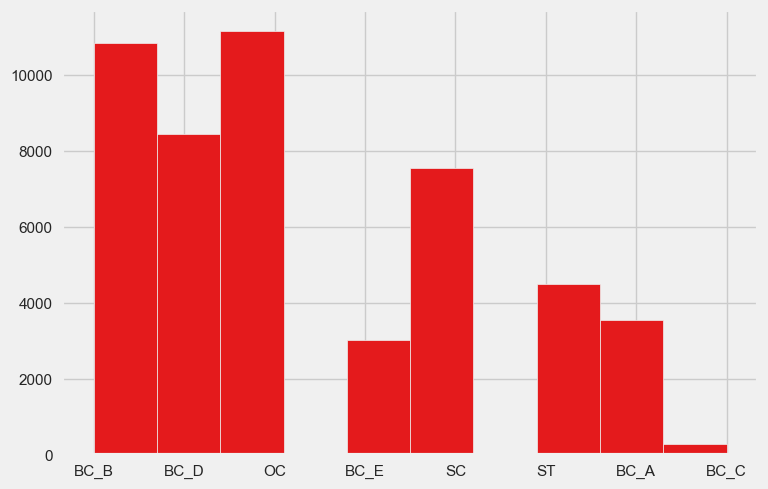

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
data_nn["CATEGORY"].hist()
plt.show()

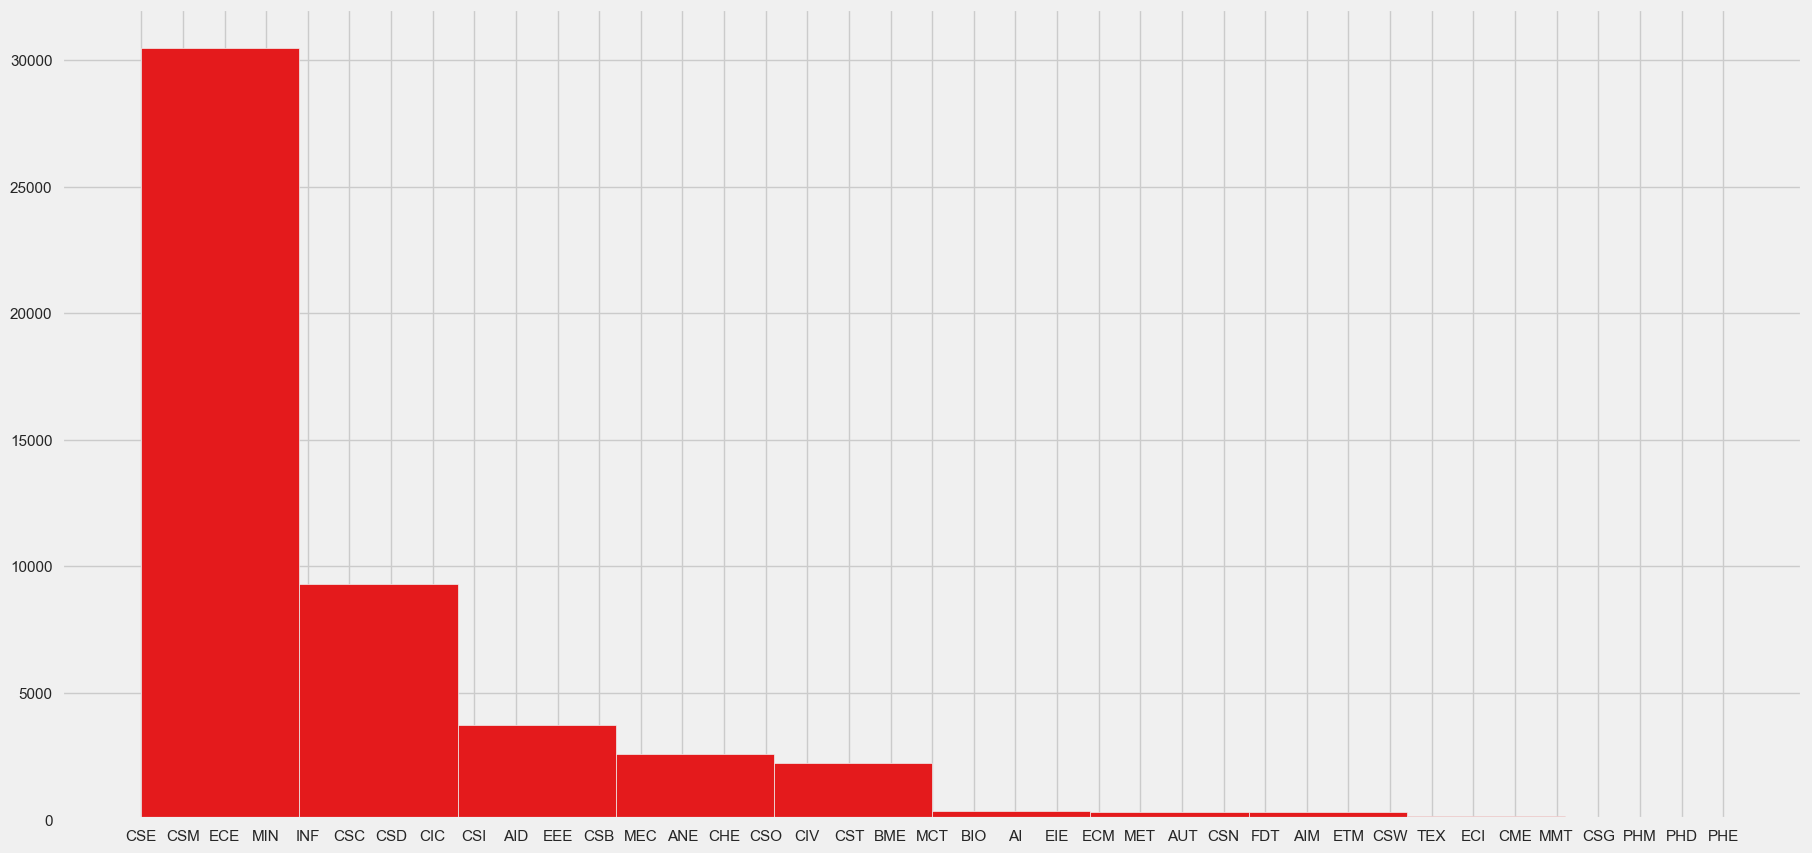

In [79]:
plt.figure(figsize=(20,10))
data_nn["BRANCH"].hist()
plt.show()

In [87]:
data[data.isin([50470]).any(1)]

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH,COLLEGE
13,50470,PAMPATI SAINADH,M,OU,OC,OC_PHH_GEN_OU,ECE,VGNT
9,50470,GANGULA CHARISHMA REDDY,F,OU,OC,EWS_GIRLS_UR,CSE,HOLY
14,50470,VEERAPALLI CHARAN LAKSHMI VARA PRASAD,M,OU,BC_D,BC_D_GEN_OU,ECE,ACEG


In [107]:
data[data['COLLEGE'].str.contains("CVRH") & data["CANDIDATE NAME"].str.contains("ABHISHEK")]

,RANK,CANDIDATE NAME,GENDER,REGION,CATEGORY,SEAT CATEGORY,BRANCH,COLLEGE
17,4276,BONAM ABHISHEK REDDY,M,OU,OC,OC_GEN_OU,CSM,CVRH
23,7380,K SAI ABHISHEK,M,OU,OC,OC_SG_GEN_OU(127),CSD,CVRH
26,8626,MADAVANENI ABHISHEK RAO,M,OU,OC,EWS_GEN_OU,INF,CVRH
50,21390,CHOLLETI ABHISHEK,M,OU,BC_B,BC_B_GEN_OU,ECE,CVRH
58,25490,CHINTHAM ABHISHEK VARA PRASAD,M,OU,BC_B,BC_B_GEN_OU,ECE,CVRH
